## Descriptive Statistics

#### Headline (the title of the news article) length

Headline Length Statistics:
       Character Count
count     1.407328e+06
mean      7.312051e+01
std       4.073531e+01
min       3.000000e+00
25%       4.700000e+01
50%       6.400000e+01
75%       8.700000e+01
max       5.120000e+02


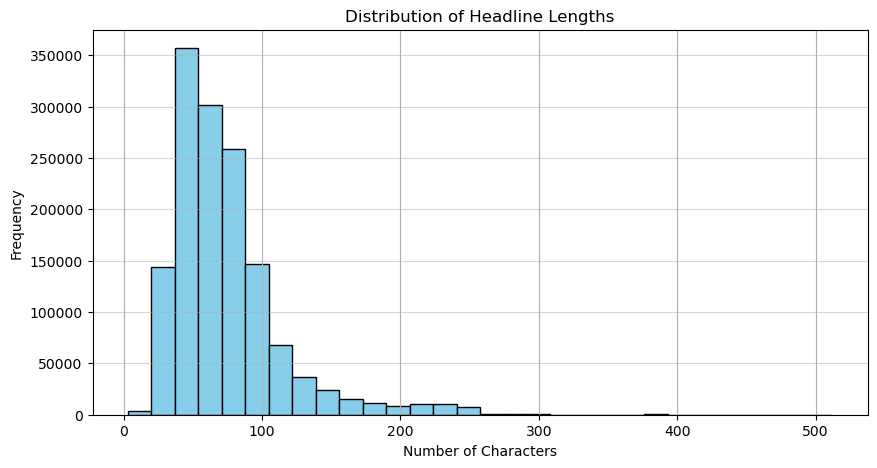

In [1]:
import pandas as pd

# Load data
df = pd.read_csv('C:/raw_analyst_ratings/raw_analyst_ratings.csv', parse_dates=['date'])

# Calculate headline lengths
df['headline_length'] = df['headline'].str.len()

# Generate statistics
text_stats = df['headline_length'].describe().to_frame()
text_stats.rename(columns={'headline_length': 'Character Count'}, inplace=True)

print("Headline Length Statistics:")
print(text_stats)

# Visual distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df['headline_length'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

#### Articles per Publisher


Top 10 Most Active Publishers:
                   Article Count  Percentage
publisher                                   
Paul Quintaro             228373   16.227418
Lisa Levin                186979   13.286100
Benzinga Newsdesk         150484   10.692888
Charles Gross              96732    6.873451
Monica Gerson              82380    5.853646
Eddie Staley               57254    4.068277
Hal Lindon                 49047    3.485115
ETF Professor              28489    2.024333
Juan Lopez                 28438    2.020709
Benzinga Staff             28114    1.997686


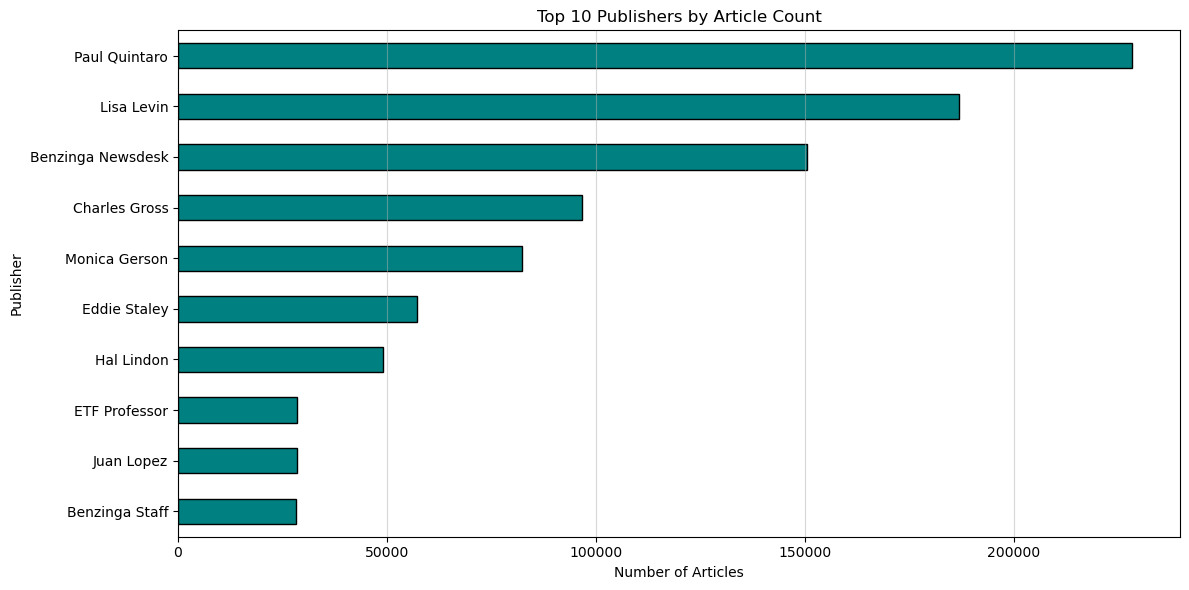

In [2]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts().to_frame()
publisher_counts.columns = ['Article Count']
publisher_counts['Percentage'] = (publisher_counts['Article Count'] / len(df)) * 100

print("\nTop 10 Most Active Publishers:")
print(publisher_counts.head(10))

# Visualization
plt.figure(figsize=(12, 6))
publisher_counts.head(10)['Article Count'].sort_values().plot(
    kind='barh', 
    color='teal',
    edgecolor='black'
)
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

#### Publication Date Trends

Date column info:
Data type: datetime64[ns, UTC-04:00]
Date range: 2009-02-14 00:00:00-04:00 to 2020-06-11 17:12:35-04:00

Sample dates:
0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]

Articles by Day of Week:
publication_day
Monday       265164
Tuesday      296470
Wednesday    300940
Thursday     302595
Friday       217892
Saturday       7753
Sunday        16514
Name: count, dtype: int64

Articles by Hour of Day (UTC-4):
publication_hour
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64


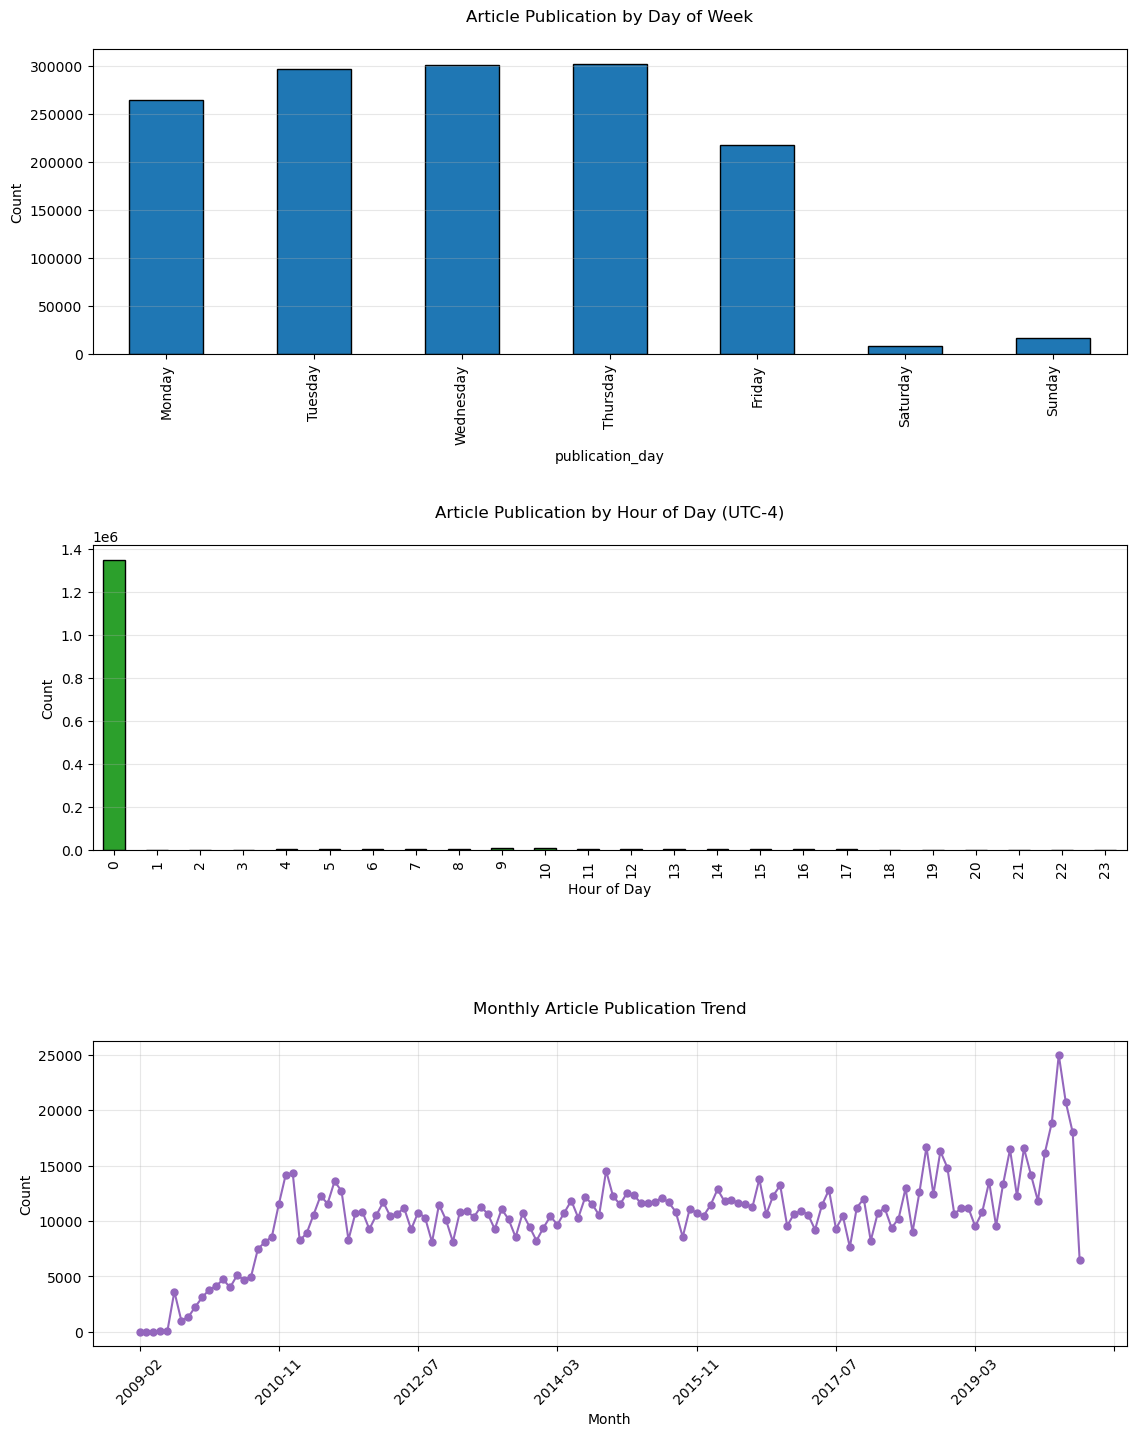

In [ ]:
# Convert datetime with proper format handling
try:
    # First try ISO8601 format
    df['date'] = pd.to_datetime(df['date'], format='ISO8601')
except ValueError:
    try:
        # Try mixed formats if ISO8601 fails
        df['date'] = pd.to_datetime(df['date'], format='mixed')
    except ValueError:
        # Fallback to inferring with dayfirst
        df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Verify conversion
print("Date column info:")
print(f"Data type: {df['date'].dtype}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print("\nSample dates:")
print(df['date'].head())

# Extract temporal features
df['publication_day'] = df['date'].dt.day_name()
df['publication_hour'] = df['date'].dt.hour
df['publication_month'] = df['date'].dt.strftime('%Y-%m')  # Alternative to Period

# Daily frequency analysis
daily_counts = df['publication_day'].value_counts()
daily_counts = daily_counts.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

print("\nArticles by Day of Week:")
print(daily_counts)

# Hourly frequency analysis
hourly_counts = df['publication_hour'].value_counts().sort_index()

print("\nArticles by Hour of Day (UTC-4):")
print(hourly_counts)

# Monthly trend analysis
monthly_counts = df['publication_month'].value_counts().sort_index()

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Day of week plot
daily_counts.plot(kind='bar', ax=ax1, color='#1f77b4', edgecolor='black')
ax1.set_title('Article Publication by Day of Week', pad=20)
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)

# Hour of day plot
hourly_counts.plot(kind='bar', ax=ax2, color='#2ca02c', edgecolor='black')
ax2.set_title('Article Publication by Hour of Day (UTC-4)', pad=20)
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Count')
ax2.grid(axis='y', alpha=0.3)

# Monthly trend plot
monthly_counts.plot(kind='line', ax=ax3, color='#9467bd', marker='o', markersize=5)
ax3.set_title('Monthly Article Publication Trend', pad=20)
ax3.set_xlabel('Month')
ax3.set_ylabel('Count')
ax3.grid(alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

#### Description analysis on Stock ticker symbol

In [ ]:
from IPython.display import display

# Generate analysis data
stock_stats = {
    'Total Articles': len(df),
    'Unique Stocks': df['stock'].nunique(),
    'Most Covered Stock': df['stock'].value_counts().idxmax(),
    'Top Stock Coverage Count': df['stock'].value_counts().max(),
    'Top Stock Coverage %': f"{df['stock'].value_counts().max()/len(df)*100:.1f}%",
    'Top 5 Stocks': '\n'.join([f"{k} ({v})" for k,v in df['stock'].value_counts().head(5).items()]),
    'Bottom 5 Stocks': '\n'.join([f"{k} ({v})" for k,v in df['stock'].value_counts().tail(5).items()])
}

# Create and display perfectly aligned table
stats_df = pd.DataFrame.from_dict(stock_stats, orient='index', columns=['Value'])
display(
    stats_df.style
    .set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap'  # Preserves newlines in Top/Bottom 5 listings
    })
    .set_table_styles([{
        'selector': 'th, td',
        'props': [('padding', '8px'),
                 ('border-bottom', '1px solid #ddd')]
    }, {
        'selector': 'th',
        'props': [('background-color', "#1b1a1a"),
                 ('font-weight', 'bold'),
                 ('text-align', 'left')]
    }])
)

,Value
Total Articles,1407328
Unique Stocks,6204
Most Covered Stock,MRK
Top Stock Coverage Count,3333
Top Stock Coverage %,0.2%
Top 5 Stocks,MRK (3333) MS (3238) NVDA (3146) MU (3142) QQQ (3106)
Bottom 5 Stocks,PLW (1) RFT (1) WIP (1) ONEQ (1) BHL (1)
